## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
train, test = tf.keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x):
    return tf.keras.utils.normalize(x, axis=-1, order=2).reshape((len(x), -1))

def preproc_y(y):
    return tf.keras.utils.to_categorical(y)

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = tf.keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = tf.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [6]:
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0, 0.2, 0.4, 0.8, 0.95]

In [7]:
def loop_momentum_experiment(nestrov_bool):
    results = {}

    for mom in MOMENTUM:
        tf.keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with momentum = %.2f" % (mom))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = tf.keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nestrov_bool, momentum=mom)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(x_test, y_test),
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-mom-%s" % str(mom)
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    return results

Experiment with momentum = 0.00
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________

Epoch 1/50
196/196 [==============================] - 2s 9ms/step - loss: 2.1588 - accuracy: 0.1991 - val_loss: 2.1007 - val_accuracy: 0.2021
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0564 - accuracy: 0.2352 - val_loss: 2.0454 - val_accuracy: 0.2272
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0190 - accuracy: 0.2545 - val_loss: 2.0282 - val_accuracy: 0.2281
Epoch 4/50
196/196 [==============================] - 2s 8ms/step - loss: 1.9888 - accuracy: 0.2737 - val_loss: 2.0561 - val_accuracy: 0.2447
Epoch 5/50
196/196 [==============================] - 1s 7ms/step - loss: 1.9732 - accuracy: 0.2793 - val_loss: 1.9411 - val_accuracy: 0.2940
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 1.9529 - accuracy: 0.2889 - val_loss: 1.9414 - val_accuracy: 0.2905
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9312 - accuracy: 0.2973 - val_loss: 1.9066 - val_accuracy: 0.3069
Epoch 

Epoch 1/50
196/196 [==============================] - 3s 11ms/step - loss: 2.1309 - accuracy: 0.2085 - val_loss: 2.1194 - val_accuracy: 0.2035
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0346 - accuracy: 0.2477 - val_loss: 2.0968 - val_accuracy: 0.1985
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9902 - accuracy: 0.2751 - val_loss: 2.0027 - val_accuracy: 0.2599
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9603 - accuracy: 0.2814 - val_loss: 1.9649 - val_accuracy: 0.2957
Epoch 5/50
196/196 [==============================] - 1s 7ms/step - loss: 1.9335 - accuracy: 0.2957 - val_loss: 1.9722 - val_accuracy: 0.2658
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9130 - accuracy: 0.3051 - val_loss: 1.9264 - val_accuracy: 0.2785
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8944 - accuracy: 0.3103 - val_loss: 1.8950 - val_accuracy: 0.3122
Epoch

Epoch 1/50
196/196 [==============================] - 3s 9ms/step - loss: 2.1291 - accuracy: 0.2102 - val_loss: 2.0531 - val_accuracy: 0.2317
Epoch 2/50
196/196 [==============================] - 1s 7ms/step - loss: 2.0243 - accuracy: 0.2528 - val_loss: 2.0699 - val_accuracy: 0.2356
Epoch 3/50
196/196 [==============================] - 1s 7ms/step - loss: 1.9778 - accuracy: 0.2762 - val_loss: 1.9673 - val_accuracy: 0.2729
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9404 - accuracy: 0.2933 - val_loss: 1.9913 - val_accuracy: 0.2592
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9160 - accuracy: 0.3029 - val_loss: 1.9011 - val_accuracy: 0.3000
Epoch 6/50
196/196 [==============================] - 1s 7ms/step - loss: 1.8927 - accuracy: 0.3096 - val_loss: 1.8711 - val_accuracy: 0.3142
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8756 - accuracy: 0.3180 - val_loss: 1.8612 - val_accuracy: 0.3212
Epoch 

Epoch 1/50
196/196 [==============================] - 3s 8ms/step - loss: 2.0767 - accuracy: 0.2309 - val_loss: 2.0223 - val_accuracy: 0.2643
Epoch 2/50
196/196 [==============================] - 2s 8ms/step - loss: 1.9540 - accuracy: 0.2883 - val_loss: 1.9441 - val_accuracy: 0.2816
Epoch 3/50
196/196 [==============================] - 1s 7ms/step - loss: 1.8981 - accuracy: 0.3066 - val_loss: 1.8943 - val_accuracy: 0.3154
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8609 - accuracy: 0.3214 - val_loss: 1.8568 - val_accuracy: 0.3192
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8342 - accuracy: 0.3333 - val_loss: 1.8112 - val_accuracy: 0.3393
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8173 - accuracy: 0.3415 - val_loss: 1.8094 - val_accuracy: 0.3387
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7937 - accuracy: 0.3456 - val_loss: 1.7871 - val_accuracy: 0.3446
Epoch 

Epoch 1/50
196/196 [==============================] - 3s 8ms/step - loss: 2.1023 - accuracy: 0.2099 - val_loss: 2.0071 - val_accuracy: 0.2526
Epoch 2/50
196/196 [==============================] - 1s 7ms/step - loss: 1.9647 - accuracy: 0.2776 - val_loss: 1.9418 - val_accuracy: 0.2938
Epoch 3/50
196/196 [==============================] - 1s 8ms/step - loss: 1.8938 - accuracy: 0.3061 - val_loss: 1.8530 - val_accuracy: 0.3247
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8647 - accuracy: 0.3151 - val_loss: 1.8255 - val_accuracy: 0.3375
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8488 - accuracy: 0.3233 - val_loss: 1.8200 - val_accuracy: 0.3356
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8167 - accuracy: 0.3351 - val_loss: 1.8150 - val_accuracy: 0.3403
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7917 - accuracy: 0.3435 - val_loss: 1.7918 - val_accuracy: 0.3426
Epoch 

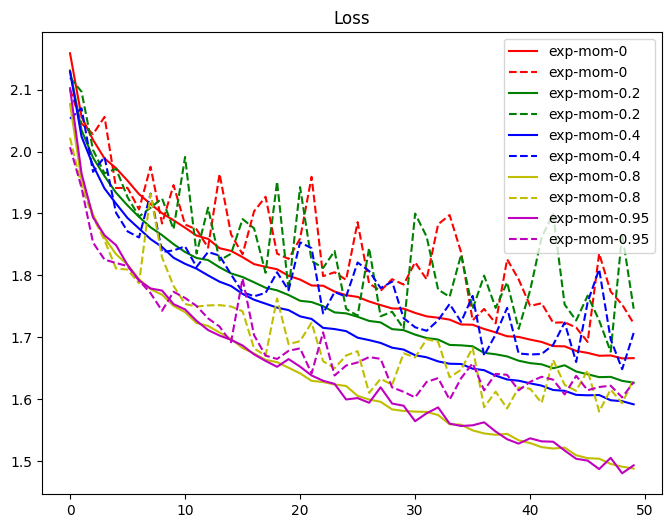

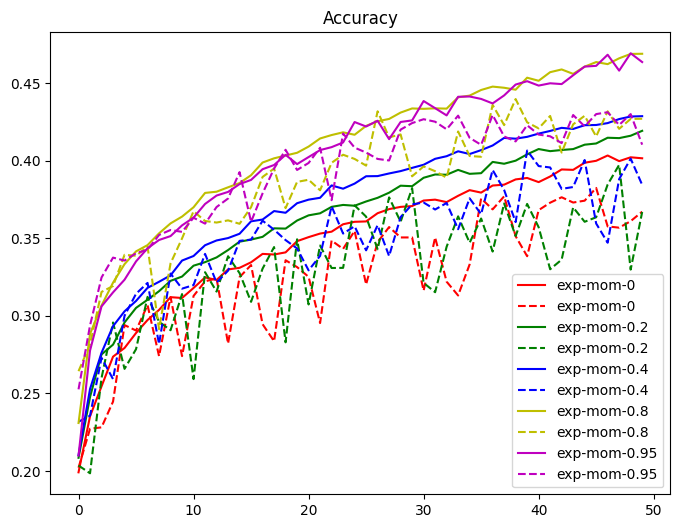

In [17]:
results_no_nestrov = loop_momentum_experiment(nestrov_bool=False)

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_no_nestrov.keys()):
    plt.plot(range(len(results_no_nestrov[cond]['train-loss'])),results_no_nestrov[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_no_nestrov[cond]['valid-loss'])),results_no_nestrov[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_no_nestrov.keys()):
    plt.plot(range(len(results_no_nestrov[cond]['train-acc'])),results_no_nestrov[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_no_nestrov[cond]['valid-acc'])),results_no_nestrov[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with momentum = 0.00
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________

Epoch 1/50
196/196 [==============================] - 7s 9ms/step - loss: 2.1535 - accuracy: 0.2066 - val_loss: 2.0730 - val_accuracy: 0.2284
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0462 - accuracy: 0.2482 - val_loss: 2.0347 - val_accuracy: 0.2581
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0090 - accuracy: 0.2604 - val_loss: 1.9846 - val_accuracy: 0.2838
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9792 - accuracy: 0.2735 - val_loss: 1.9841 - val_accuracy: 0.2710
Epoch 5/50
196/196 [==============================] - 1s 7ms/step - loss: 1.9548 - accuracy: 0.2878 - val_loss: 1.9265 - val_accuracy: 0.2981
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9389 - accuracy: 0.2899 - val_loss: 1.9679 - val_accuracy: 0.2807
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9226 - accuracy: 0.2980 - val_loss: 1.9032 - val_accuracy: 0.3108
Epoch 

Epoch 1/50
196/196 [==============================] - 3s 8ms/step - loss: 2.1383 - accuracy: 0.2029 - val_loss: 2.0703 - val_accuracy: 0.2349
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0452 - accuracy: 0.2442 - val_loss: 2.1515 - val_accuracy: 0.1927
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0056 - accuracy: 0.2643 - val_loss: 1.9772 - val_accuracy: 0.2764
Epoch 4/50
196/196 [==============================] - 2s 8ms/step - loss: 1.9772 - accuracy: 0.2775 - val_loss: 1.9556 - val_accuracy: 0.2892
Epoch 5/50
196/196 [==============================] - 1s 7ms/step - loss: 1.9539 - accuracy: 0.2866 - val_loss: 1.9552 - val_accuracy: 0.2829
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9300 - accuracy: 0.2984 - val_loss: 1.9241 - val_accuracy: 0.2934
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9204 - accuracy: 0.3013 - val_loss: 1.9124 - val_accuracy: 0.2965
Epoch 

Epoch 1/50
196/196 [==============================] - 3s 10ms/step - loss: 2.1310 - accuracy: 0.2045 - val_loss: 2.1063 - val_accuracy: 0.1969
Epoch 2/50
196/196 [==============================] - 1s 7ms/step - loss: 2.0343 - accuracy: 0.2500 - val_loss: 2.1190 - val_accuracy: 0.2179
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9899 - accuracy: 0.2721 - val_loss: 2.0678 - val_accuracy: 0.2444
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9633 - accuracy: 0.2838 - val_loss: 1.9279 - val_accuracy: 0.3018
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9299 - accuracy: 0.2995 - val_loss: 1.9596 - val_accuracy: 0.2737
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9081 - accuracy: 0.3062 - val_loss: 1.8825 - val_accuracy: 0.3198
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8904 - accuracy: 0.3116 - val_loss: 2.0672 - val_accuracy: 0.2272
Epoch

Epoch 1/50
196/196 [==============================] - 3s 8ms/step - loss: 2.0871 - accuracy: 0.2211 - val_loss: 1.9993 - val_accuracy: 0.2611
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9676 - accuracy: 0.2780 - val_loss: 1.9797 - val_accuracy: 0.2664
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9167 - accuracy: 0.3003 - val_loss: 1.9276 - val_accuracy: 0.2925
Epoch 4/50
196/196 [==============================] - 1s 7ms/step - loss: 1.8713 - accuracy: 0.3198 - val_loss: 1.9467 - val_accuracy: 0.2867
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8446 - accuracy: 0.3256 - val_loss: 1.8545 - val_accuracy: 0.3194
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8215 - accuracy: 0.3349 - val_loss: 1.8302 - val_accuracy: 0.3200
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7997 - accuracy: 0.3466 - val_loss: 1.9695 - val_accuracy: 0.2886
Epoch 

Epoch 1/50
196/196 [==============================] - 3s 8ms/step - loss: 2.0354 - accuracy: 0.2474 - val_loss: 1.9449 - val_accuracy: 0.2823
Epoch 2/50
196/196 [==============================] - 1s 7ms/step - loss: 1.8792 - accuracy: 0.3127 - val_loss: 1.8470 - val_accuracy: 0.3234
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8199 - accuracy: 0.3354 - val_loss: 1.8149 - val_accuracy: 0.3291
Epoch 4/50
196/196 [==============================] - 2s 8ms/step - loss: 1.7807 - accuracy: 0.3509 - val_loss: 1.8342 - val_accuracy: 0.3253
Epoch 5/50
196/196 [==============================] - 1s 7ms/step - loss: 1.7475 - accuracy: 0.3670 - val_loss: 1.7748 - val_accuracy: 0.3455
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7204 - accuracy: 0.3782 - val_loss: 1.7352 - val_accuracy: 0.3679
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6964 - accuracy: 0.3868 - val_loss: 1.7327 - val_accuracy: 0.3796
Epoch 

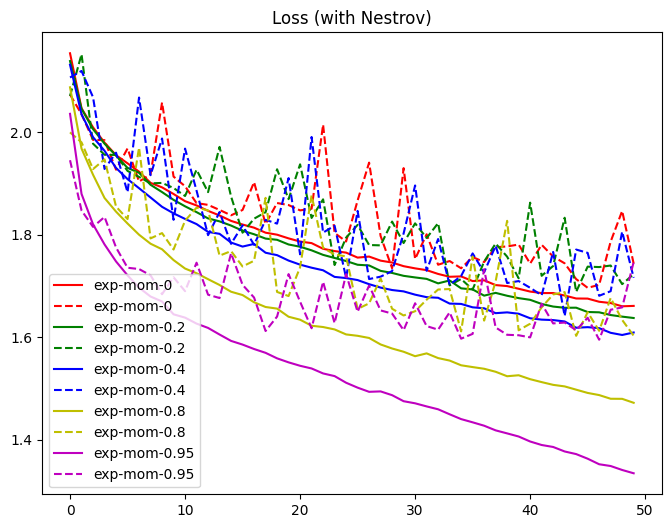

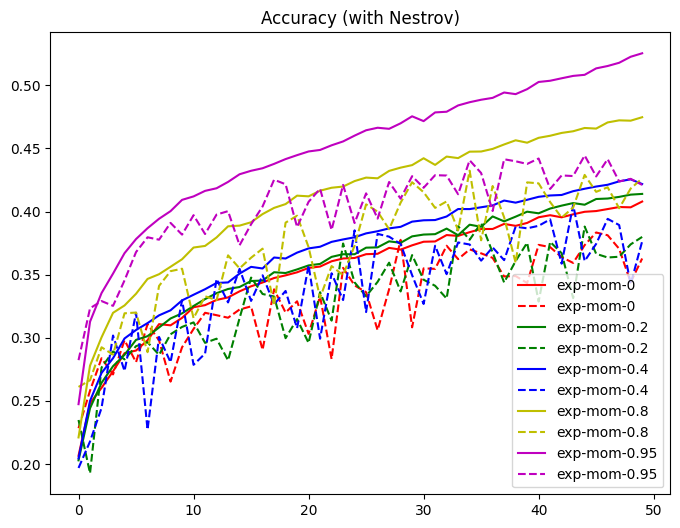

In [8]:
results_with_nestrov = loop_momentum_experiment(nestrov_bool=True)

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_with_nestrov.keys()):
    plt.plot(range(len(results_with_nestrov[cond]['train-loss'])),results_with_nestrov[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_with_nestrov[cond]['valid-loss'])),results_with_nestrov[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss (with Nestrov)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_with_nestrov.keys()):
    plt.plot(range(len(results_with_nestrov[cond]['train-acc'])),results_with_nestrov[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_with_nestrov[cond]['valid-acc'])),results_with_nestrov[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy (with Nestrov)")
plt.legend()
plt.show()